# Code exercise 

In [1]:
import numpy as np 
import pandas as pd 
import scipy as sp 
import matplotlib.pyplot as plt 

Exercise 11-1.
I  explained  that  the  residuals  are  orthogonal  to  the  predicted  data  (in  other  words,
εTy= 0).  Illustrate  this  in  the  toy  dataset  from  this  chapter.  In  particular,  make  a
scatterplot  of  the  predicted  data  by  the  errors  (as  in  Figure  11-6).  Then  compute
the dot product and the correlation coefficient between the residuals and the model-predicted  data.  In  theory,  both  should  be  exactly  zero,  although  there  are  some
rounding errors. Which of those two analyses (dot product or correlation) is smaller,
and why is that?

In [31]:
# creat fake data 
def fake_func(x): 
    return 5 * x - 10 +  np.random.randint(low=-100, high = 100, size = 1)

x = np.random.randint(low = 1, high = 70, size = (25, 1))
y = np.array([fake_func(i) for i in list(x)])


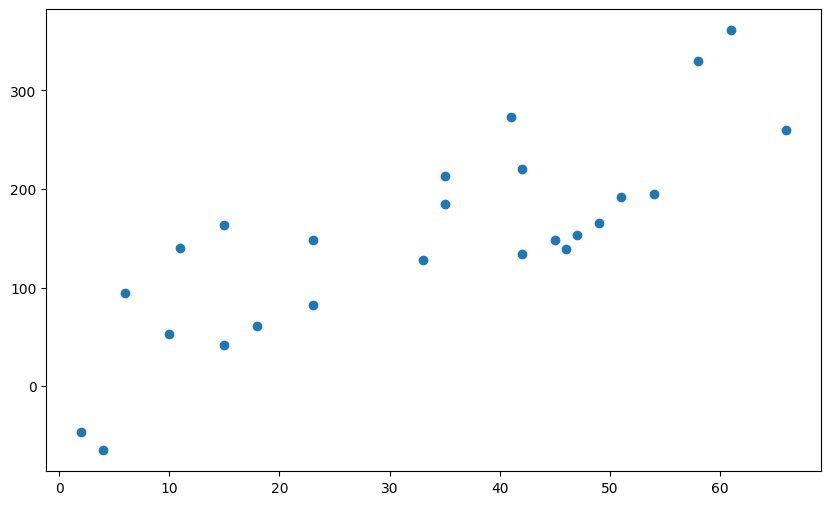

In [32]:
fig, ax = plt.subplots(figsize = (10, 6))

ax.scatter(x, y)


plt.show()

In [33]:
beta = np.linalg.inv(x.T@x) @ x.T @ y
y_hat = x @ beta
error = y - y_hat



In [34]:
T = np.dot(y_hat.T, error)

In [35]:
T

array([[4.24718525e-11]])

In [37]:
C = np.corrcoef(y_hat,error)[0,1]
C

nan

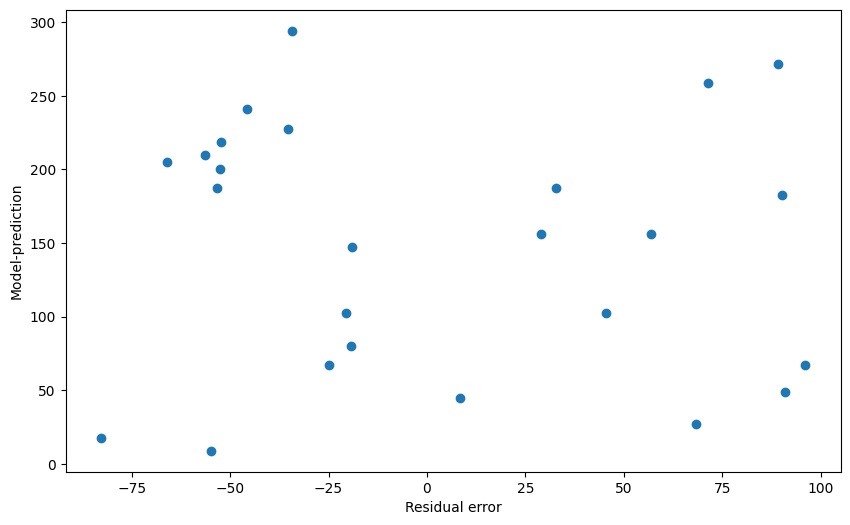

In [39]:
fig,  ax = plt.subplots(figsize = (10, 6))

ax.scatter(error, y_hat)
ax.set_xlabel('Residual error')
ax.set_ylabel('Model-prediction')

plt.show()

Exercise 11-2.
The model-predicted happiness is merely one way of linearly combining the columns
of  the  design  matrix.  But  the  residuals  vector  isn’t  only  orthogonal  to  that  one
linear weighted combination; instead, the residuals vector is orthogonal to the entire
subspace  spanned  by  the  design  matrix.  Demonstrate  this  in  Python  (hint:  think  of
the left-null space and rank)

- Lời giải : để chứng minh residuals vector vuông góc với toàn bộ subspace được span bởi design matrix (ma trận đầu vào) ta tính null-space của ma trận đó và chứng minh rằng nullspace và augment nullspace có cùng rank 

In [40]:
from scipy.linalg import null_space 

nullspace = null_space(x.T)

augmentnullspace = np.hstack((nullspace, error))

In [42]:
print(f'dim(  N(X)    ) = {np.linalg.matrix_rank(nullspace)}')
print(f'dim( [N(X)|r] ) = {np.linalg.matrix_rank(augmentnullspace)}')

dim(  N(X)    ) = 24
dim( [N(X)|r] ) = 24


Exercise 11-3.
You  are  now  going  to  compute  least  squares  via  QR  decomposition,  as  I  explained
in  “Least  Squares  via  QR”  on  page  187.  In  particular,  compute  and  compare  the
following solution methods: (1) the left-inverse XTX −1XTy, (2) QR with the inverse
as R−1QTy, and (3) Gauss-Jordan elimination on the matrix R augmented with QTy.
Print out the beta parameters from the three methods as follows. (Rounding to three
digits after the decimal point is an optional extra coding challenge.)

In [43]:
beta_o = np.linalg.inv(x.T@x) @ x.T @ y

In [44]:
Q, R = np.linalg.qr(x) 

beta_qr = np.linalg.inv(R) @ Q.T @ y 

In [59]:
import sympy 

tmp = (Q.T @ y)
raug = np.hstack((R, tmp))
raug_r = sympy.Matrix(raug).rref()
beta_r = np.array(raug_r[0][1])


In [61]:
print('Betas from left-inverse: ')
print(np.round(beta_o,3)), print(' ')

print('Betas from QR with inv(R): ')
print(np.round(beta_qr,3)), print(' ')

print('Betas from QR with back-substitution: ')
print(np.round(np.array(beta_r.T).astype(float),3)) # transposed to facilitate visual inspection

Betas from left-inverse: 
[[4.457]]
 
Betas from QR with inv(R): 
[[4.457]]
 
Betas from QR with back-substitution: 
4.457


Exercise 11-4.
Outliers are data values that are unusual or nonrepresentative. Outliers can cause significant problems in statistical models, and therefore can cause significant headaches
for  data  scientists.  In  this  exercise,  we  will  create  outliers  in  the  happiness  data  to
observe the effects on the resulting least squares solution.
In  the  data  vector,  change  the  first  observed  data  point  from  70  to  170  (simulating
a  data-entry  typo).  Then  recompute  the  least  squares  fit  and  plot  the  data.  Repeat
this  outlier  simulation  but  change  the  final  data  point  from  70  to  170  (and  set  the
first data point back to its original 70). Compare with the original data by creating a
visualization like Figure 11-7.
Interestingly,  the  outlier  was  identical  in  the  outcome  variable  (in  both  cases,  the  70
turned into 170), but the effect on the fit of the model to the data was quite different
because of the corresponding x-axis value. This differential impact of outliers is called leverage  and  is  something  you  would  learn  about  in  a  deeper  discussion  of  statistics
and model fitting

In [62]:
# data 

numcourses = [13,4,12,3,14,13,12,9,11,7,13,11,9,2,5,7,10,0,9,7]
happiness  = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]
happiness_oops1 = [170,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]
happiness_oops2 = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,170]

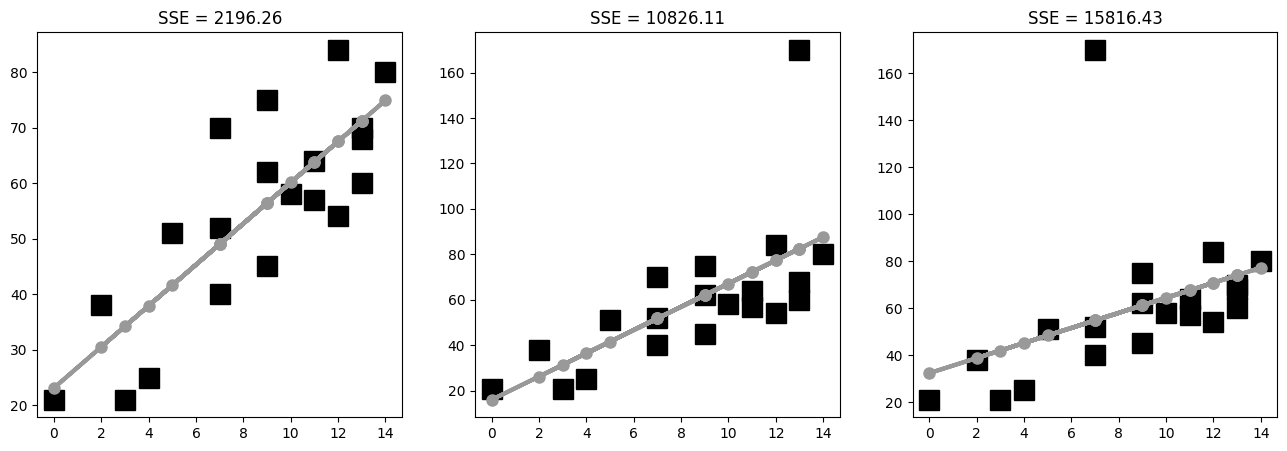

In [65]:
X = np.hstack((np.ones((20,1)),np.array(numcourses,ndmin=2).T))

x_leftinv = np.linalg.inv(X.T@X) @ X.T
_,axs = plt.subplots(1,3,figsize=(16,5))

for axi, y in zip(axs, [happiness, happiness_oops1, happiness_oops2]) : 
    beta = x_leftinv @ y 
    pred_data = X @ beta 

    axi.plot(numcourses, y, 'ks',markersize=15)
    axi.plot(numcourses,pred_data,'o-',color=[.6,.6,.6],linewidth=3,markersize=8)
    axi.set_title(f'SSE = {np.sum((pred_data-y)**2):.2f}')
plt.show()

Exercise 11-5.
In  this  exercise,  you  will  compute  the  matrix  inverse  using  least  squares,  following
the interpetation I introduced in the previous chapter. We will consider the equation
XB= Y, where X is the square full-rank matrix to invert, B is the matrix of unknown
coefficients  (which  will  be  the  matrix  inverse),  and  Y  is  the  “observed  data”  (the
identity matrix).
You  will  compute  B  in  three  ways.  First,  use  the  left-inverse  least  squares  method
to  compute  the  matrix  one  column  at  a  time.  This  is  done  by  computing  the  least
squares  fit  between  the  matrix  X  and  each  column  of  Y  in  a  for  loop.  Second,  use
the  left-inverse  method  to  compute  the  entire  B  matrix  in  one  line  of  code.  Finally,
compute X−1 using the function np.linalg.inv(). Mutliply each of those B matrices
by X and show in a figure like Figure 11-8. Finally, test whether these three “different”
ways  of  computing  the  inverse  are  equivalent  (they  should  be,  because  the  matrix
inverse is unique).
Observation:  it  is  rather  strange  (not  to  mention  circular)  to  use  the  inverse  of  XTX
to compute the inverse of X. (Indeed, you should confirm with paper and pencil that
the  left-inverse  reduces  to  the  full  inverse  for  square  full-rank  X!)  Needless  to  say,
this is not a computational method that would be implemented in practice. However,
this exercise reinforces the interpretation of the matrix inverse as the transformation
that  projects  a  matrix  onto  the  identity  matrix,  and  that  that  projection  matrix  can
be obtained via least squares. Comparing the least squares solution to np.linalg.inv
also  illustrates  the  numerical  inaccuracies  that  can  arise  when  computing  the  left-
inverse.
Figure 11-8. Solution to Exercise 11-5
Code Exercises | 191


In [71]:
n = 10 

X = np.random.randn(n, n)
Y = np.eye(n )


# method 1 
X_inv1 = np.zeros_like(X)
for i in range(n): 
    X_inv1[:, i] = np.linalg.inv(X.T @ X) @X.T @ Y[:, i]


# method 2 
X_inv2 = np.linalg.inv(X.T @ X)@ X.T @ Y


# method 3 

X_inv3 = np.linalg.inv(X)

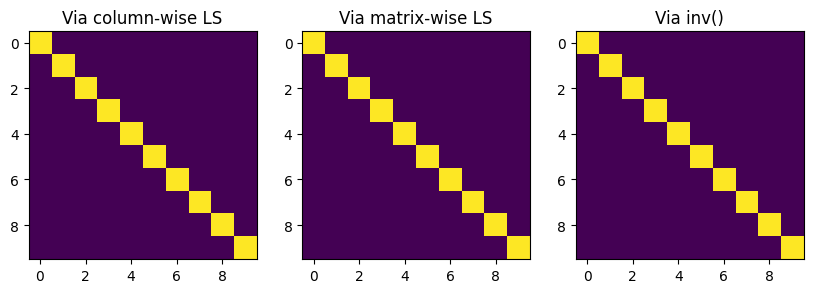

In [73]:
fig, ax = plt.subplots(nrows=1, ncols = 3, figsize = (10, 6))

ax[0].imshow(X_inv1 @ X)
ax[0].set_title('Via column-wise LS')

ax[1].imshow(X_inv2 @ X)
ax[1].set_title('Via matrix-wise LS')

ax[2].imshow(X_inv3 @ X)
ax[2].set_title('Via inv()')

plt.show()

=> Ta so sánh 3 cách tính left-inverse, ta có thể tính ma trận nghịch đảo thông qua Least square 